# Comparison of DQN Improvements
---
In this notebook, implement improvements to a DQN agent with OpenAI Gym's LunarLander-v2 environment and compare the performance of the models.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


In [3]:
from dqn_agent import Agent

agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0)

# watch an untrained agent
state = env.reset()
for j in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

### 3. Train the Agent with DQN

Run the code cell below to train the DQN agent from scratch.

Episode 100	Average Score: -173.74
Episode 200	Average Score: -118.24
Episode 300	Average Score: -69.93
Episode 400	Average Score: -15.94
Episode 500	Average Score: 83.28
Episode 600	Average Score: 34.05
Episode 700	Average Score: 125.70
Episode 800	Average Score: 155.11
Episode 900	Average Score: 160.12
Episode 1000	Average Score: 131.18
Episode 1100	Average Score: 195.74
Episode 1141	Average Score: 200.95
Environment solved in 1041 episodes!	Average Score: 200.95


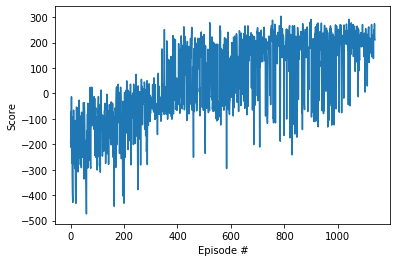

<Figure size 432x288 with 0 Axes>

In [4]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'weights/checkpoint_dqn.pth')
            break
    return scores

scores_DQN = dqn()

# Save the scores for comparison
with open("dqn_scores.txt", "wb") as fp:
    pickle.dump(scores_DQN, fp)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_DQN)), scores_DQN)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('DQN-Agent-performance.png')
plt.show()

### 5. Train an Agent with improvements : Double DQN

This improvement is used to reduce the problem of overestimation of the state values in the early stages of training.


In [5]:
from ddqn_agent import Agent

agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0)

Episode 100	Average Score: -153.80
Episode 200	Average Score: -106.05
Episode 300	Average Score: -57.50
Episode 400	Average Score: -20.61
Episode 500	Average Score: 30.96
Episode 600	Average Score: 119.33
Episode 700	Average Score: 157.08
Episode 800	Average Score: 181.85
Episode 900	Average Score: 186.94
Episode 947	Average Score: 200.16
Environment solved in 847 episodes!	Average Score: 200.16


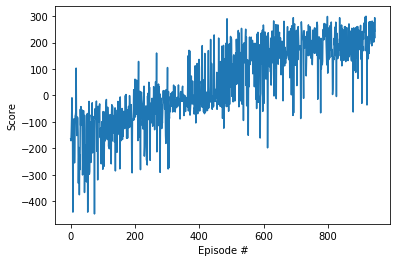

<Figure size 432x288 with 0 Axes>

In [6]:
def ddqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Double Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'weights/checkpoint_ddqn.pth')
            break
    return scores

ddqn_scores = ddqn()

# Save the scores for comparison
with open("ddqn_scores.txt", "wb") as fp:
    pickle.dump(ddqn_scores, fp)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(ddqn_scores)), ddqn_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('Double-DQN-Agent-performance.png')
plt.show()

### 6. Training an Dueling Deep Q Network Agent

Core idea behind Dueling Q Networks is to use two streams inside the network model: 

1. To calculate the state-value functions.
2. To calculate the advantage values for actions in a state.

This is to be used in cases where the states donot vary a lot across actions. Although, the state values may not change a lot, the actions may be very different for each state. This presents the need for two individual streams inside a model.

### 7. Before running the next cell, make the following changes in dqn_agent.py

1. Comment out the "Q-Network" block of code in dqn_agent constructor > Lines [37-39]
2. Uncomment the "Dueling-Q-Network" block of code in dqn_agent constructor > Lines [42-44]

Run the next cell to train a Dueling-Q-Network-Agent



In [7]:
from dqn_agent import Agent

agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0)

Episode 100	Average Score: -170.61
Episode 200	Average Score: -104.71
Episode 300	Average Score: -51.15
Episode 400	Average Score: 36.17
Episode 500	Average Score: 75.41
Episode 600	Average Score: 100.04
Episode 700	Average Score: 90.65
Episode 800	Average Score: 161.13
Episode 900	Average Score: 196.25
Episode 919	Average Score: 200.04
Environment solved in 819 episodes!	Average Score: 200.04


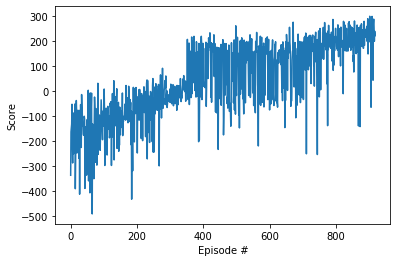

<Figure size 432x288 with 0 Axes>

In [8]:
def duelingdqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Dueling Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'weights/checkpoint_duelingdqn.pth')
            break
    return scores

duelingdqn_scores = duelingdqn()

# Save the scores for comparison
with open("duelingdqn_scores.txt", "wb") as fp:
    pickle.dump(duelingdqn_scores, fp)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(duelingdqn_scores)), duelingdqn_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('Dueling-DQN-Agent-performance.png')
plt.show()

### 5. Train an Agent with improvements : Deuling Double DQN

<Add Content HEre>

Before running the next cell, make the following changes in the ddqn_agent.py

1. Comment out the "Q-Network" block of code in dqn_agent constructor > Lines [37-39]
2. Uncomment the "Dueling-Q-Network" block of code in dqn_agent constructor > Lines [42-44]

Run the next cell to train a Dueling-Double-DQN Agent

In [9]:
from ddqn_agent import Agent

agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.n, seed=0)

Episode 100	Average Score: -161.31
Episode 200	Average Score: -107.57
Episode 300	Average Score: -93.07
Episode 400	Average Score: -17.35
Episode 500	Average Score: -8.76
Episode 600	Average Score: 70.36
Episode 700	Average Score: 110.10
Episode 800	Average Score: 188.19
Episode 838	Average Score: 200.39
Environment solved in 738 episodes!	Average Score: 200.39


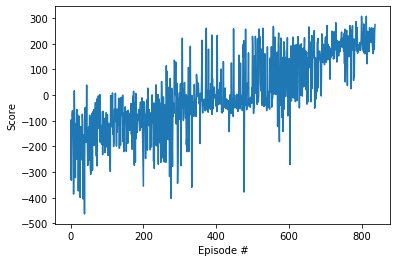

<Figure size 432x288 with 0 Axes>

In [10]:
def duelingddqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Dueling Double Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'weights/checkpoint_duelingddqn.pth')
            break
    return scores

duelingddqn_scores = duelingddqn()

# Save the scores for comparison
with open("duelingddqn_scores.txt", "wb") as fp:
    pickle.dump(duelingddqn_scores, fp)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(duelingddqn_scores)), duelingddqn_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('Dueling-Double-DQN-Agent-performance.png')
plt.show()

### 9. Watch a Trained Agent!

In the next code cell, load the trained weights from file to watch a smart agent!

In [15]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('weights/checkpoint_duelingddqn.pth'))

for i in range(3):
    state = env.reset()
    for j in range(1000):
        action = agent.act(state)
        env.render()
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()

#### 10. Plot the Scores v/s Episodes for each agent, and observe the learning curve. 

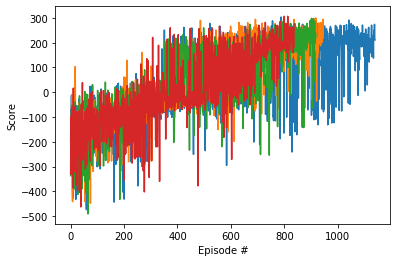

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_DQN)), scores_DQN, label='DQN-Agent')
plt.plot(np.arange(len(ddqn_scores)), ddqn_scores, label='Double-DQN-Agent')
plt.plot(np.arange(len(duelingdqn_scores)), duelingdqn_scores, label='Dueling-DQN-Agent')
plt.plot(np.arange(len(duelingddqn_scores)), duelingddqn_scores, label='Dueling-Double-DQN-Agent')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('performance/AllAgentsPerformance.png')
plt.show()